In [1]:
import os
import loompy
import scipy
import pandas
import scanpy as sc
import scvelo as scv
import jinja2

In [ ]:
adata = sc.read("immune_adata.h5ad", cache=True)
ldata = sc.read("placenta_combo.loom", cache=True)
adata = scv.utils.merge(adata, ldata)

In [2]:
scv.settings.verbosity = 3  # show errors(0), warnings(1), info(2), hints(3)
scv.settings.presenter_view = True  # set max width size for presenter view
scv.settings.set_figure_params('scvelo')  # for beautified visualization
scv.set_figure_params(vector_friendly=False)

In [9]:
scv.pp.filter_and_normalize(adata, min_shared_counts=30, n_top_genes=2000)
scv.pp.moments(adata, n_pcs=30, n_neighbors=30)

Filtered out 11545 genes that are detected 30 counts (shared).
Normalized count data: spliced, unspliced.
Extracted 2000 highly variable genes.
Logarithmized X.
computing neighbors


/gscratch/kawaldorflab/jcorn427/miniconda3/lib/python3.12/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
/tmp/ipykernel_48649/3645217284.py:2: DeprecationWarning: Automatic neighbor calculation is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors first with Scanpy.
  scv.pp.moments(adata, n_pcs=30, n_neighbors=30)
/gscratch/kawaldorflab/jcorn427/miniconda3/lib/python3.12/site-packages/scvelo/preprocessing/moments.py:71: DeprecationWarning: `neighbors` is deprecated since scvelo==0.4.0 and will be removed in a future version of scVelo. Please compute neighbors with Scanpy.
  neighbors(


    finished (0:00:07) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:01) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)


In [10]:
scv.tl.velocity(adata)
scv.tl.velocity_graph(adata)

computing velocities
    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/40 cores)
or disable the progress bar using `show_progress_bar=False`.


/gscratch/kawaldorflab/jcorn427/miniconda3/lib/python3.12/site-packages/scvelo/tools/optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))
/gscratch/kawaldorflab/jcorn427/miniconda3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=48649) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()


    finished (0:00:06) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


/gscratch/kawaldorflab/jcorn427/miniconda3/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/gscratch/kawaldorflab/jcorn427/miniconda3/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/gscratch/kawaldorflab/jcorn427/miniconda3/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/gscratch/kawaldorflab/jcorn427/mi

saving figure to file ./figures/scvelo_immune_clusters.svg


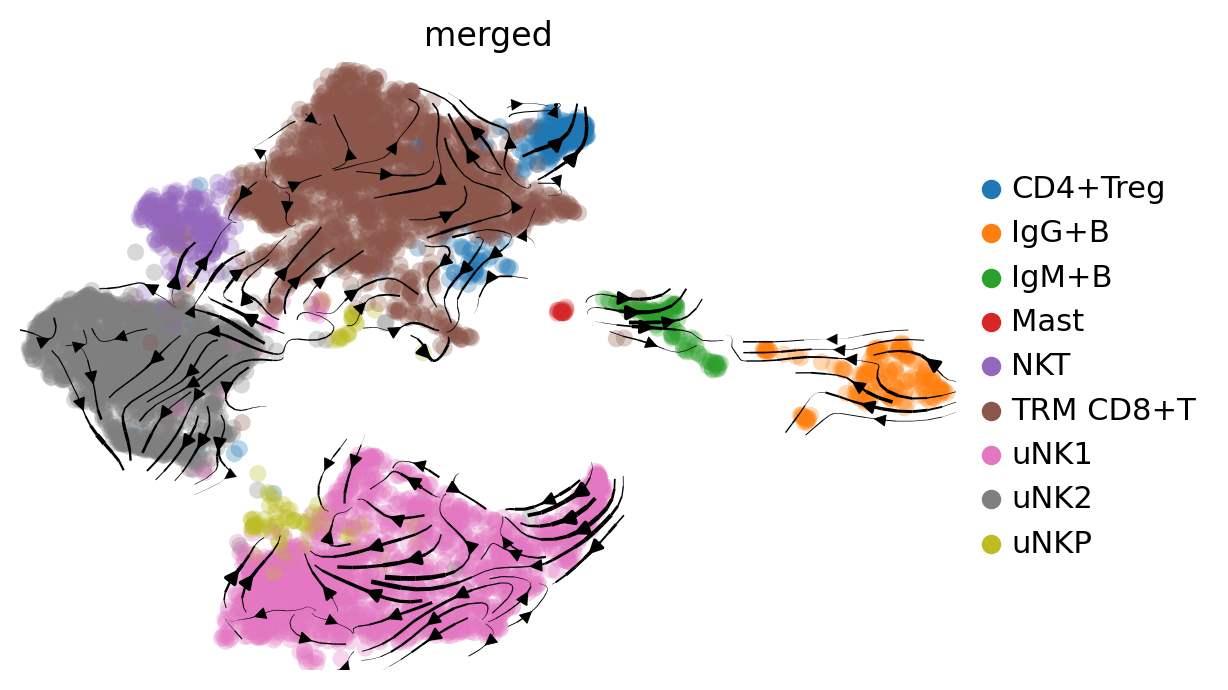

In [11]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color= "merged", legend_loc = "right margin", save = "immune_clusters.svg")

In [12]:
scv.tl.differential_kinetic_test(adata, groupby='merged')

recovering dynamics (using 1/40 cores)


/gscratch/kawaldorflab/jcorn427/miniconda3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=48649) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()


    finished (0:02:40) --> added 
    'fit_pars', fitted parameters for splicing dynamics (adata.var)
testing for differential kinetics
    finished (0:01:02) --> added 
    'fit_diff_kinetics', clusters displaying differential kinetics (adata.var)
    'fit_pvals_kinetics', p-values of differential kinetics (adata.var)


In [3]:
#scv.tl.recover_dynamics(adata)

#adata.write('/gscratch/kawaldorflab/jcorn427/placenta/scVelo_work/data/immune.h5ad', compression='gzip')
adata = sc.read('/gscratch/kawaldorflab/jcorn427/placenta/scVelo_work/data/immune.h5ad')
adata.obs.columns

Index(['Barcode', 'SCT_snn_res.0.25', 'SCT_snn_res.0.5',
       'SingleR.cluster.labels', 'Subgroup', 'celltype10', 'celltype11',
       'celltype12', 'celltype13', 'celltype14', 'celltype15', 'celltype16',
       'celltype17', 'celltype18', 'celltype4', 'celltype6', 'celltype7',
       'celltype8', 'celltype9', 'classification', 'fet_sex', 'main_labels',
       'mast', 'merged', 'nCount_RNA', 'nCount_SCT', 'nFeature_RNA',
       'nFeature_SCT', 'orig.ident', 'percent.mt', 'sample_id',
       'seurat_clusters', 'sub_labels', 'tissue_type', 'sample_batch',
       'initial_size_unspliced', 'initial_size_spliced', 'initial_size',
       'n_counts', 'velocity_self_transition'],
      dtype='object')

In [14]:
top_genes = adata.var['fit_likelihood'].sort_values(ascending=False).index[:100]
scv.tl.differential_kinetic_test(adata, var_names=top_genes, groupby='merged')

testing for differential kinetics
    finished (0:00:18) --> added 
    'fit_diff_kinetics', clusters displaying differential kinetics (adata.var)
    'fit_pvals_kinetics', p-values of differential kinetics (adata.var)


/gscratch/kawaldorflab/jcorn427/miniconda3/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/gscratch/kawaldorflab/jcorn427/miniconda3/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/gscratch/kawaldorflab/jcorn427/miniconda3/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/gscratch/kawaldorflab/jcorn427/mi

saving figure to file ./figures/scvelo_immune_diff_kin_top_15.svg


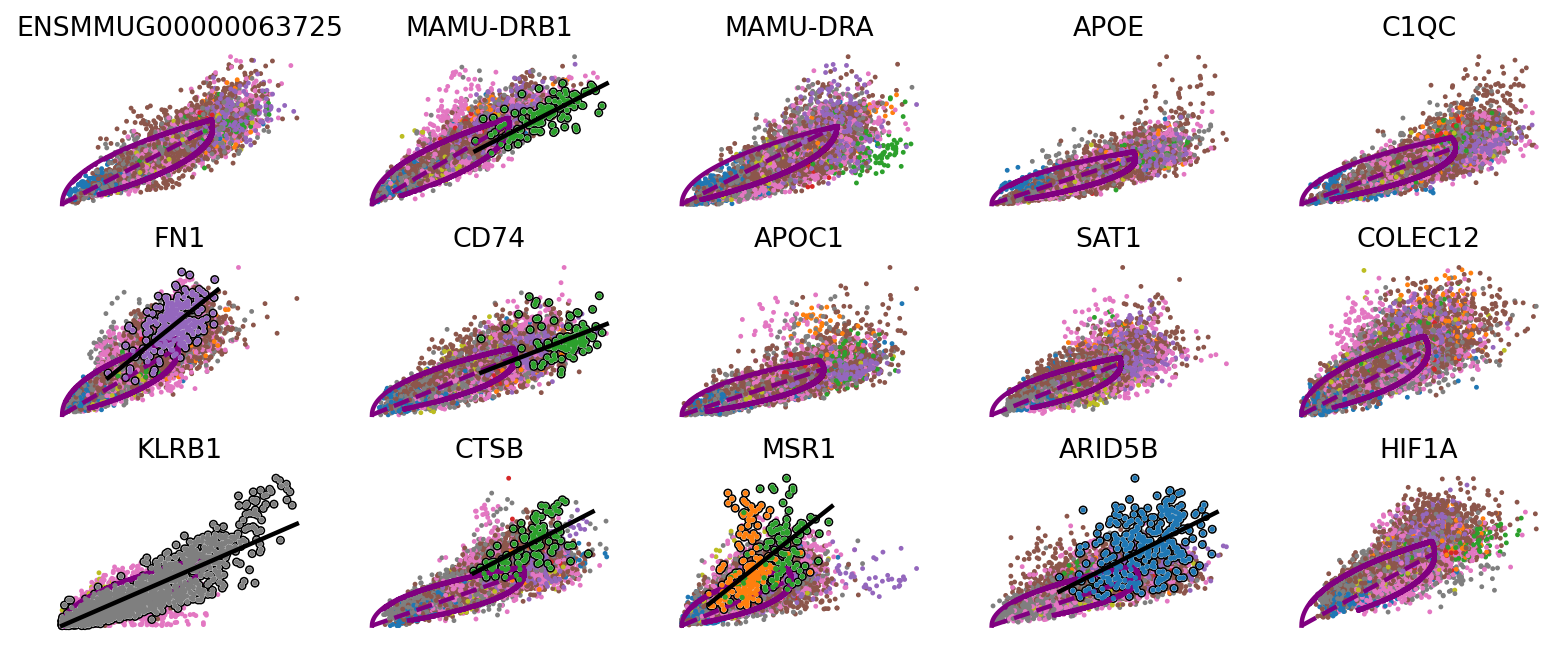

In [33]:
kwargs = dict(linewidth=2, add_linfit=True, frameon=False)
scv.pl.scatter(adata, basis=top_genes[:15], ncols=5, add_outline='fit_diff_kinetics', **kwargs, save="immune_diff_kin_top_15.svg")

/gscratch/kawaldorflab/jcorn427/miniconda3/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/gscratch/kawaldorflab/jcorn427/miniconda3/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/gscratch/kawaldorflab/jcorn427/miniconda3/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/gscratch/kawaldorflab/jcorn427/mi

saving figure to file ./figures/scvelo_immune_diff_kin_top_15_30.svg


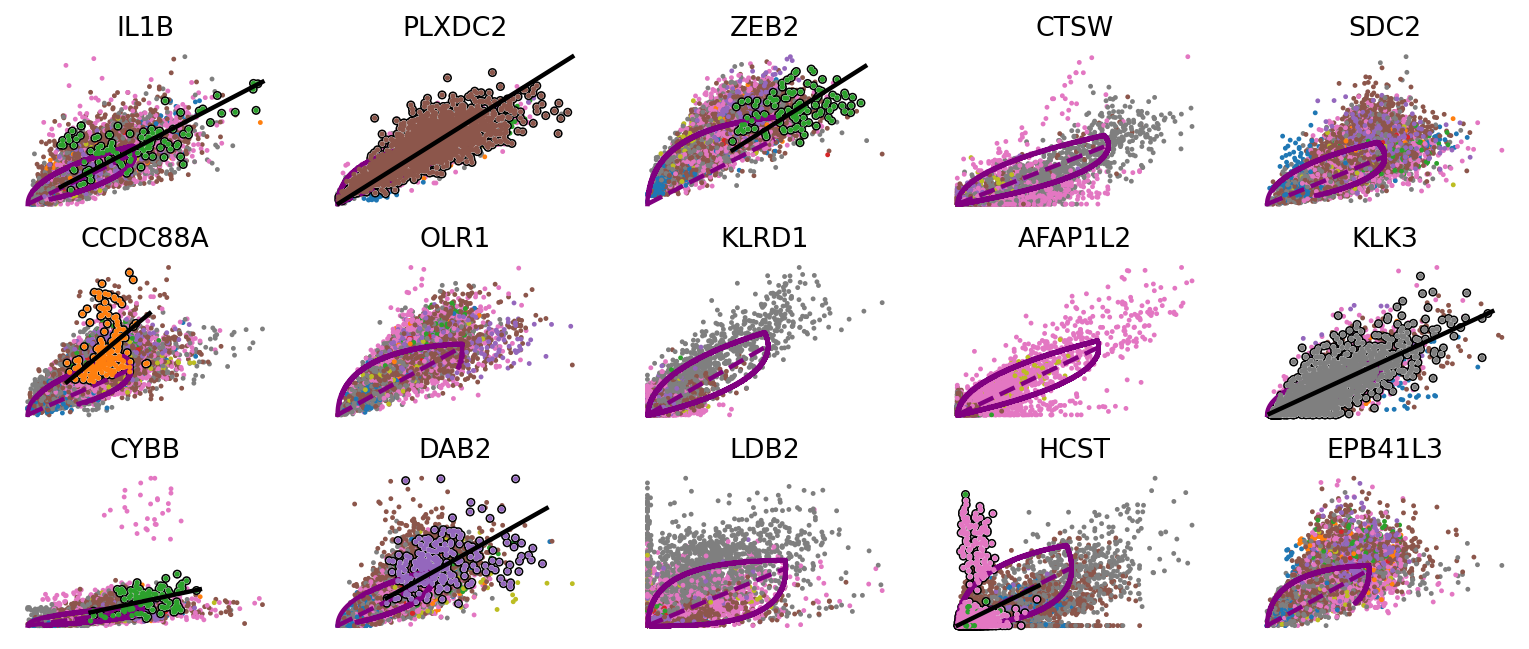

In [34]:
scv.pl.scatter(adata, basis=top_genes[15:30], ncols=5, add_outline='fit_diff_kinetics', **kwargs, save="immune_diff_kin_top_15_30.svg")

In [15]:
scv.tl.velocity(adata, diff_kinetics=True)
scv.tl.velocity_graph(adata)

computing velocities


/gscratch/kawaldorflab/jcorn427/miniconda3/lib/python3.12/site-packages/scvelo/tools/optimization.py:184: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  gamma[i] = np.linalg.pinv(A.T.dot(A)).dot(A.T.dot(y[:, i]))


    finished (0:00:01) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)
computing velocity graph (using 1/40 cores)


/gscratch/kawaldorflab/jcorn427/miniconda3/lib/python3.12/multiprocessing/popen_fork.py:66: DeprecationWarning: This process (pid=48649) is multi-threaded, use of fork() may lead to deadlocks in the child.
  self.pid = os.fork()


    finished (0:00:07) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)


/gscratch/kawaldorflab/jcorn427/miniconda3/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/gscratch/kawaldorflab/jcorn427/miniconda3/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/gscratch/kawaldorflab/jcorn427/miniconda3/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/gscratch/kawaldorflab/jcorn427/mi

saving figure to file ./figures/scvelo_immune_dif_kin.pdf


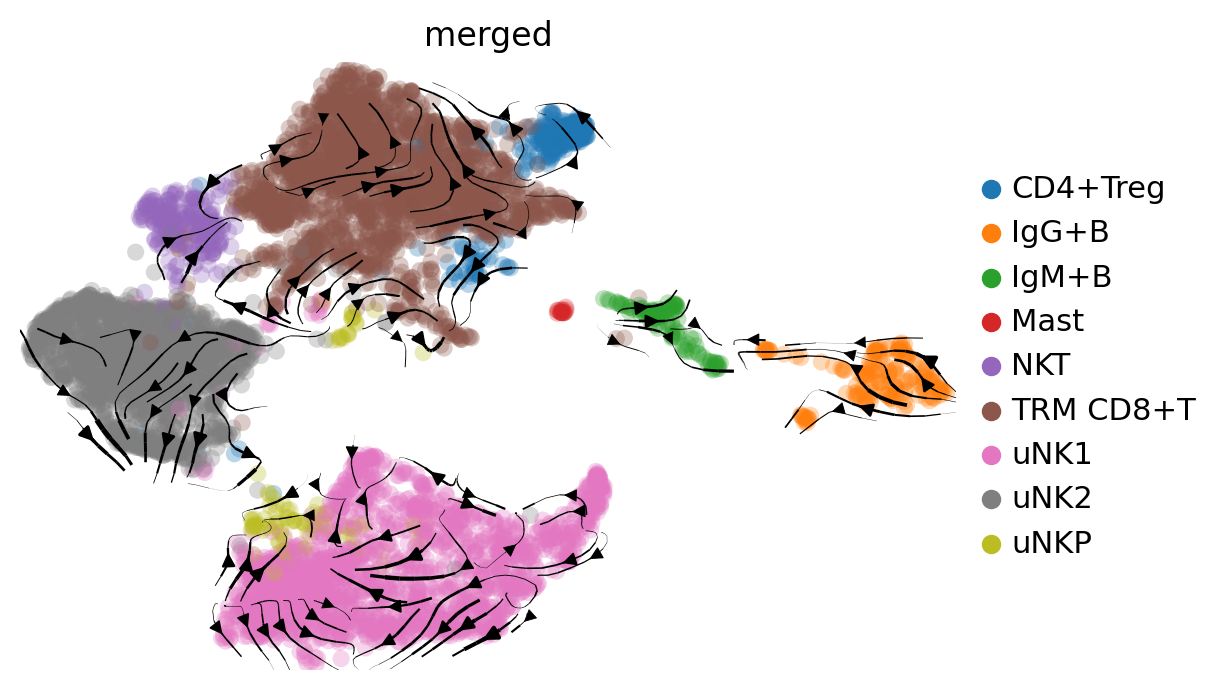

In [16]:
scv.pl.velocity_embedding_stream(adata, basis='umap', color= "merged", legend_loc = "right margin", save = "immune_dif_kin.pdf")

/gscratch/kawaldorflab/jcorn427/miniconda3/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/gscratch/kawaldorflab/jcorn427/miniconda3/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/gscratch/kawaldorflab/jcorn427/miniconda3/lib/python3.12/site-packages/scvelo/plotting/utils.py:68: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  return isinstance(c, str) and c in data.obs.keys() and cat(data.obs[c])
/gscratch/kawaldorflab/jcorn427/mi

saving figure to file ./figures/scvelo_immune_cell_direction_dif_kin.svg


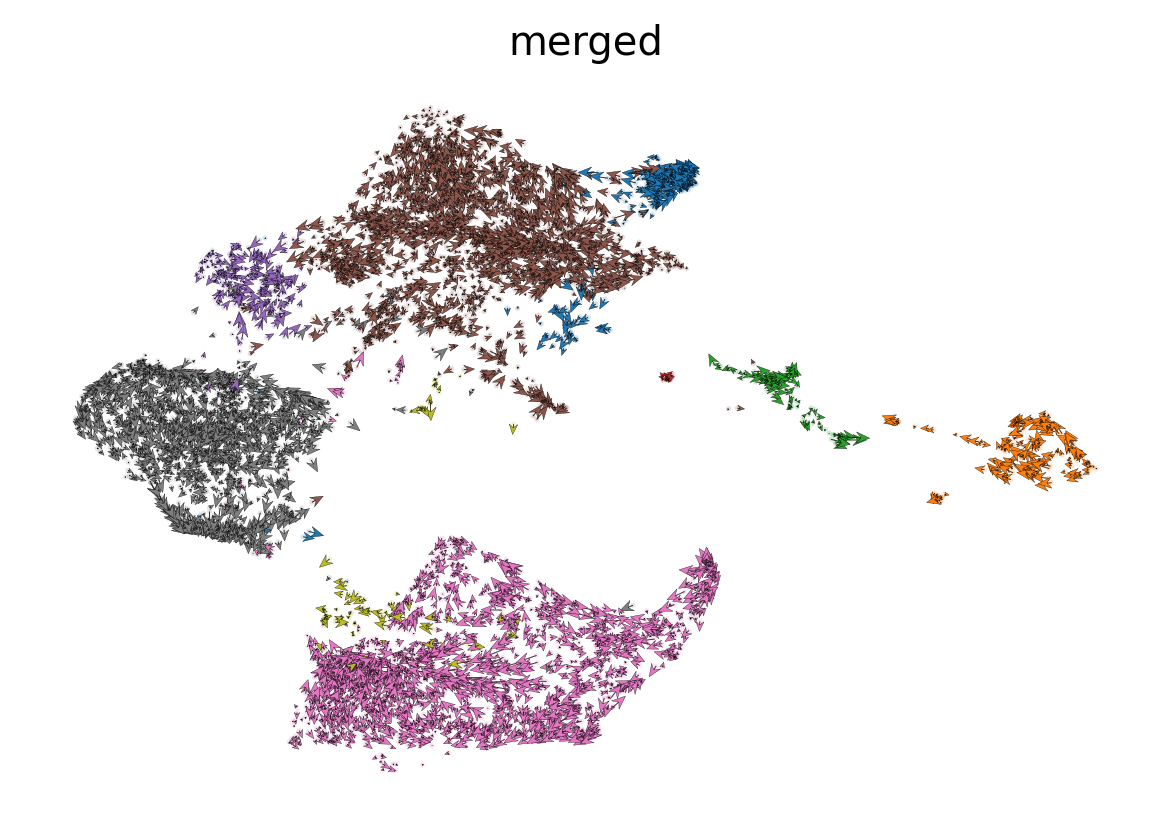

In [37]:
scv.pl.velocity_embedding(adata, arrow_length=3, arrow_size=2, dpi=120, color= "merged", save= "immune_cell_direction_dif_kin.svg")

computing terminal states
    identified 4 regions of root cells and 1 region of end points .
    finished (0:00:00) --> added
    'root_cells', root cells of Markov diffusion process (adata.obs)
    'end_points', end points of Markov diffusion process (adata.obs)
computing latent time using root_cells as prior
    finished (0:00:01) --> added 
    'latent_time', shared time (adata.obs)
saving figure to file ./figures/scvelo_immune_cell_dif_kin_latent_time.pdf


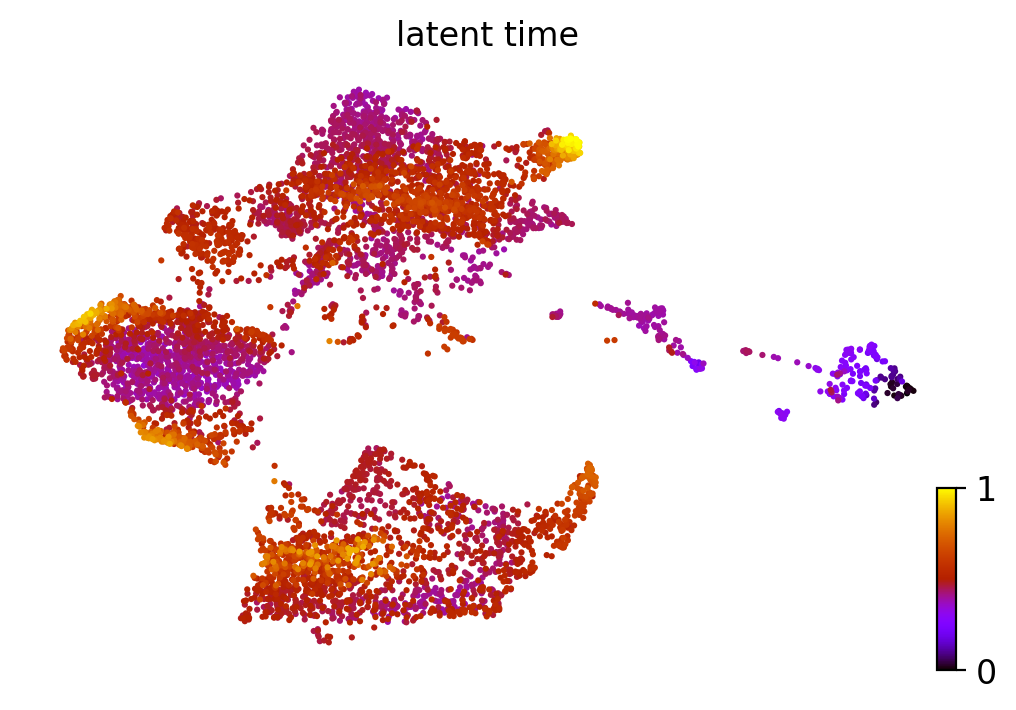

In [4]:
scv.tl.latent_time(adata)
scv.pl.scatter(adata, color='latent_time', color_map='gnuplot', size=20, save="immune_cell_dif_kin_latent_time.pdf")